** Robert Lacher **  
** MATH 3332 **  
** Final Exam **  

In [68]:
from __future__ import division
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Question 2  

A table below describes the results of the new cancer treatment.   

Calculate the following $P(Cancer\ Cured\ |\ New\ Treatment)$ and $P(New\ Treatment\ |\ Cancer\ Cured)$.

 | Cancer Cured | Cancer Not Cured
--- | --- | ---
New Treatment | 13 | 9
Old Treatment | 7 | 5

The probability that cancer is cured given the new treatment can be denoted as:

$P(Cancer\ Cured\ |\ New\ Treatment) = { P(New\ Treatment\ \cap\ Cancer\ Cured) \over P(New\ Treatment) } $

In [16]:
p = ((22 / 34) * (20 / 34)) / (22 / 34)
print '{:.2%}%'.format(p)

58.82%%


The probability that the new treatment is used given that the cancer was cured can be denoted as:

$P(New\ Treatment\ |\ Cancer\ Cured) = { P(Cancer\ Cured\ \cap\ New\ Treatment) \over P(Cancer\ Cured) } $

In [15]:
p = ((20 / 34) * (22 / 24)) / (20 / 34)
print '{:.2%}%'.format(p)

91.67%%


# Question 4  

## 1. Create a column of 100 random numbers from Z-distribution. 

In [36]:
random_nums = np.random.uniform(size=100)

## 2. Using these Z-random numbers create a second column of reciprocals of the first column, i.e, compute 1/Z-random

In [37]:
reciprocals = np.array([( 1 / value) for value in random_nums])

## 3. Answer the following question: is the second column normally distributed?

Below is the histogram and probability plot for the Z-distribution values:

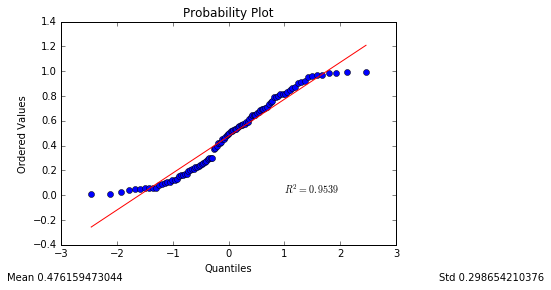

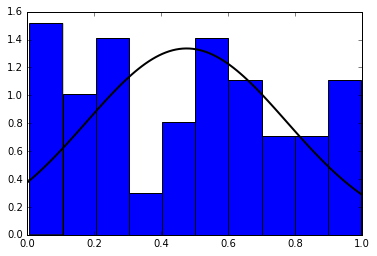

In [42]:
values = random_nums

# Create a seperate figure to create the probability plot
fig = plt.figure()
fig.text(0, 0, 'Mean %s' % np.mean(values))
fig.text(1, 0, 'Std %s' % np.std(values))
# Produce the probability plot
scipy.stats.probplot(values, plot=plt)

# Create a separate figure to create the histogram
fig2 = plt.figure()
# Produce the histogram using normalized values
plt.hist(values, normed=True)

# Add the normal distribution curve to the plot
mu, std = scipy.stats.norm.fit(values)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = scipy.stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

And the histogram and probability plot for the reciprocals:

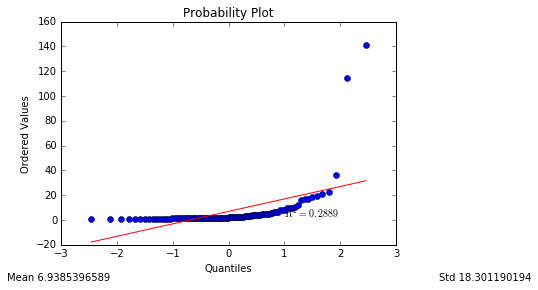

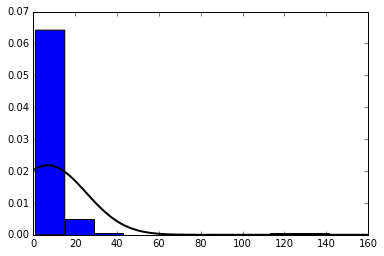

In [43]:
values = reciprocals

# Create a seperate figure to create the probability plot
fig = plt.figure()
fig.text(0, 0, 'Mean %s' % np.mean(values))
fig.text(1, 0, 'Std %s' % np.std(values))
# Produce the probability plot
scipy.stats.probplot(values, plot=plt)

# Create a separate figure to create the histogram
fig2 = plt.figure()
# Produce the histogram using normalized values
plt.hist(values, normed=True)

# Add the normal distribution curve to the plot
mu, std = scipy.stats.norm.fit(values)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = scipy.stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

The answer is **no** -- the reciprocals are not normally distributed.  

To do this I created both histograms and probability plots and visually assessed the results. In addition I calculated the $R^2$ value and saw that the normal distribution had a value of 0.95, while the reciprocals only had a value of 0.28.

# Question 5  

A researcher conduct an experiment were he obtains a random sample of 100 from the population.  The researcher records the sample means and sample standard deviations for each experiment. They are in the table below.  

Sample mean | Sample std
--- | ---
12 | 1.68
11.2 | 1.67
12.3 | 1.78
11.9 | 1.43
12.3 | 1.87

## 1. Calculate 95% Confidence interval for each sample.

In [66]:
samples = [
    [12, 1.68],
    [11.2, 1.67],
    [12.3, 1.78],
    [11.9, 1.43],
    [12.3, 1.87]
]

left_endpoints = []
right_endpoints = []
for sample in samples:
    left, right = scipy.stats.norm.interval(alpha=0.95, loc=sample[0], scale=sample[1])
    print '{} to {}'.format(left, right)
    left_endpoints.append(left)
    right_endpoints.append(right)

8.70726050597 to 15.292739494
7.92686014582 to 14.4731398542
8.81126410752 to 15.7887358925
9.09725150211 to 14.7027484979
8.63486734891 to 15.9651326511


## 2. Find the intersection of all five confidence intervals.

In [67]:
max_left = max(left_endpoints)
min_right = min(right_endpoints)

print '{} to {}'.format(max_left, min_right)

9.09725150211 to 14.4731398542


## 3. How confident are you that the intersection contains the real mean?  

Idk

# Question 9

Using Monte-Carlo Method estimate the integral  

$ \int_{0.05}^2 \sin ( {1 \over \sqrt x })dx $

Integral estimation = 2.0457


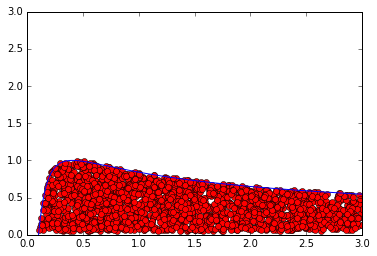

In [93]:
# Constants
START = 0
STOP = 3
NUM_ITERATIONS = 10000
X_START = 0.05
X_STOP = STOP

# Given function to compute
def f(x):
    return math.sin(1 / math.sqrt(x) )

# x and y will be used to create plot of function
x = np.linspace(X_START, X_STOP, 1000)
y = np.array([f(value) for value in x])

# Create and set limits on plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(START, STOP)
ax.set_ylim(START, STOP)

# Create random x, y coordinates from normal distribution
x_random = np.random.uniform(X_START, X_STOP, NUM_ITERATIONS)
y_random = np.random.uniform(X_START, X_STOP, NUM_ITERATIONS)

# Perform Monte Carlo
result = 0
for x_r, y_r in zip(x_random, y_random):
    
    # If x and y are underneath the graph, plot the point and increment number of points underneath graph
    if x_r > X_START and y_r < f(x_r):
        plt.plot(x_r, y_r, 'ro')
        result += 1

plt.plot(x, y)
print 'Integral estimation = {}'.format((result / NUM_ITERATIONS) * 3 ** 2)